In [11]:
import pickle
import numpy as np

In [12]:
with open("train.txt","rb") as fp:
    train_data=pickle.load(fp)

In [13]:
with open("test.txt","rb") as fp:
    test_data=pickle.load(fp)

In [14]:
type(test_data)

list

In [15]:
train_data

[(['Mary',
   'moved',
   'to',
   'the',
   'bathroom',
   '.',
   'Sandra',
   'journeyed',
   'to',
   'the',
   'bedroom',
   '.'],
  ['Is', 'Sandra', 'in', 'the', 'hallway', '?'],
  'no'),
 (['Mary',
   'moved',
   'to',
   'the',
   'bathroom',
   '.',
   'Sandra',
   'journeyed',
   'to',
   'the',
   'bedroom',
   '.',
   'Mary',
   'went',
   'back',
   'to',
   'the',
   'bedroom',
   '.',
   'Daniel',
   'went',
   'back',
   'to',
   'the',
   'hallway',
   '.'],
  ['Is', 'Daniel', 'in', 'the', 'bathroom', '?'],
  'no'),
 (['Mary',
   'moved',
   'to',
   'the',
   'bathroom',
   '.',
   'Sandra',
   'journeyed',
   'to',
   'the',
   'bedroom',
   '.',
   'Mary',
   'went',
   'back',
   'to',
   'the',
   'bedroom',
   '.',
   'Daniel',
   'went',
   'back',
   'to',
   'the',
   'hallway',
   '.',
   'Sandra',
   'went',
   'to',
   'the',
   'kitchen',
   '.',
   'Daniel',
   'went',
   'back',
   'to',
   'the',
   'bathroom',
   '.'],
  ['Is', 'Daniel', 'in', 'the', '

In [16]:
len(train_data)

10000

In [17]:
len(test_data)

1000

In [18]:
train_data[0]

(['Mary',
  'moved',
  'to',
  'the',
  'bathroom',
  '.',
  'Sandra',
  'journeyed',
  'to',
  'the',
  'bedroom',
  '.'],
 ['Is', 'Sandra', 'in', 'the', 'hallway', '?'],
 'no')

In [19]:
vocab = set()

In [20]:
all_data = test_data+train_data

In [21]:
type(all_data)

list

In [22]:
len(all_data)

11000

In [23]:
for a in all_data:
    print(a)
    break

(['Mary', 'got', 'the', 'milk', 'there', '.', 'John', 'moved', 'to', 'the', 'bedroom', '.'], ['Is', 'John', 'in', 'the', 'kitchen', '?'], 'no')


In [24]:
for story,question,answer in all_data:
    vocab = vocab.union(set(story))
    vocab = vocab.union(set(question))    

In [25]:
vocab.add("yes")
vocab.add("no")

In [26]:
len(vocab)

37

In [27]:
vocab

{'.',
 '?',
 'Daniel',
 'Is',
 'John',
 'Mary',
 'Sandra',
 'apple',
 'back',
 'bathroom',
 'bedroom',
 'discarded',
 'down',
 'dropped',
 'football',
 'garden',
 'got',
 'grabbed',
 'hallway',
 'in',
 'journeyed',
 'kitchen',
 'left',
 'milk',
 'moved',
 'no',
 'office',
 'picked',
 'put',
 'the',
 'there',
 'to',
 'took',
 'travelled',
 'up',
 'went',
 'yes'}

In [28]:
vocab_len=len(vocab)+1

In [29]:
max_story_len = max([len(data[0]) for data in all_data])
max_story_len

156

In [30]:
max_ques_len = max([len(data[1]) for data in all_data])
max_ques_len

6

In [31]:
from keras.preprocessing.sequence import pad_sequences
from keras.preprocessing.text import Tokenizer

In [32]:
tokenizer = Tokenizer(filters=[])

In [33]:
tokenizer.fit_on_texts(vocab)

In [34]:
tokenizer.word_index

{'.': 35,
 '?': 1,
 'apple': 20,
 'back': 8,
 'bathroom': 21,
 'bedroom': 17,
 'daniel': 28,
 'discarded': 32,
 'down': 13,
 'dropped': 31,
 'football': 33,
 'garden': 3,
 'got': 4,
 'grabbed': 34,
 'hallway': 14,
 'in': 27,
 'is': 15,
 'john': 11,
 'journeyed': 18,
 'kitchen': 26,
 'left': 29,
 'mary': 24,
 'milk': 16,
 'moved': 25,
 'no': 19,
 'office': 22,
 'picked': 23,
 'put': 10,
 'sandra': 6,
 'the': 37,
 'there': 9,
 'to': 2,
 'took': 12,
 'travelled': 36,
 'up': 5,
 'went': 7,
 'yes': 30}

In [35]:
train_story_text=[]
train_question_text=[]
train_answers=[]

for story, question, answer in train_data:
    train_story_text.append(story)
    train_question_text.append(question)

In [36]:
train_story_seq = tokenizer.texts_to_sequences(train_story_text)

In [37]:
len(train_story_text)

10000

In [38]:
len(train_story_seq)

10000

In [39]:
train_story_seq

[[24, 25, 2, 37, 21, 35, 6, 18, 2, 37, 17, 35],
 [24,
  25,
  2,
  37,
  21,
  35,
  6,
  18,
  2,
  37,
  17,
  35,
  24,
  7,
  8,
  2,
  37,
  17,
  35,
  28,
  7,
  8,
  2,
  37,
  14,
  35],
 [24,
  25,
  2,
  37,
  21,
  35,
  6,
  18,
  2,
  37,
  17,
  35,
  24,
  7,
  8,
  2,
  37,
  17,
  35,
  28,
  7,
  8,
  2,
  37,
  14,
  35,
  6,
  7,
  2,
  37,
  26,
  35,
  28,
  7,
  8,
  2,
  37,
  21,
  35],
 [24,
  25,
  2,
  37,
  21,
  35,
  6,
  18,
  2,
  37,
  17,
  35,
  24,
  7,
  8,
  2,
  37,
  17,
  35,
  28,
  7,
  8,
  2,
  37,
  14,
  35,
  6,
  7,
  2,
  37,
  26,
  35,
  28,
  7,
  8,
  2,
  37,
  21,
  35,
  28,
  23,
  5,
  37,
  33,
  9,
  35,
  28,
  7,
  2,
  37,
  17,
  35],
 [24,
  25,
  2,
  37,
  21,
  35,
  6,
  18,
  2,
  37,
  17,
  35,
  24,
  7,
  8,
  2,
  37,
  17,
  35,
  28,
  7,
  8,
  2,
  37,
  14,
  35,
  6,
  7,
  2,
  37,
  26,
  35,
  28,
  7,
  8,
  2,
  37,
  21,
  35,
  28,
  23,
  5,
  37,
  33,
  9,
  35,
  28,
  7,
  2,
  37,
  17,
  3

In [40]:
train_story_text

[['Mary',
  'moved',
  'to',
  'the',
  'bathroom',
  '.',
  'Sandra',
  'journeyed',
  'to',
  'the',
  'bedroom',
  '.'],
 ['Mary',
  'moved',
  'to',
  'the',
  'bathroom',
  '.',
  'Sandra',
  'journeyed',
  'to',
  'the',
  'bedroom',
  '.',
  'Mary',
  'went',
  'back',
  'to',
  'the',
  'bedroom',
  '.',
  'Daniel',
  'went',
  'back',
  'to',
  'the',
  'hallway',
  '.'],
 ['Mary',
  'moved',
  'to',
  'the',
  'bathroom',
  '.',
  'Sandra',
  'journeyed',
  'to',
  'the',
  'bedroom',
  '.',
  'Mary',
  'went',
  'back',
  'to',
  'the',
  'bedroom',
  '.',
  'Daniel',
  'went',
  'back',
  'to',
  'the',
  'hallway',
  '.',
  'Sandra',
  'went',
  'to',
  'the',
  'kitchen',
  '.',
  'Daniel',
  'went',
  'back',
  'to',
  'the',
  'bathroom',
  '.'],
 ['Mary',
  'moved',
  'to',
  'the',
  'bathroom',
  '.',
  'Sandra',
  'journeyed',
  'to',
  'the',
  'bedroom',
  '.',
  'Mary',
  'went',
  'back',
  'to',
  'the',
  'bedroom',
  '.',
  'Daniel',
  'went',
  'back',
  'to

In [41]:
def vectorize_stories(data, word_index = tokenizer.word_index, 
                      max_story_len =max_story_len, max_ques_len=max_ques_len):
    X=[]
    Xq=[]
    Y=[]
    
    for story, query, answer in data:
        x=[word_index[word.lower()] for word in story]
        xq=[word_index[word.lower()] for word in query]
        y=np.zeros(len(word_index) +1)
        y[word_index[answer]]=1
        
        X.append(x)
        Xq.append(xq)
        Y.append(y)
        
    return (pad_sequences(X, maxlen= max_story_len), 
            pad_sequences(Xq, maxlen = max_ques_len), 
            np.array(Y))

In [42]:
inputs_train,queries_train,answers_train = vectorize_stories(train_data)

In [43]:
inputs_test,queries_test,answers_test = vectorize_stories(test_data)

In [44]:
inputs_train

array([[ 0,  0,  0, ..., 37, 17, 35],
       [ 0,  0,  0, ..., 37, 14, 35],
       [ 0,  0,  0, ..., 37, 21, 35],
       ...,
       [ 0,  0,  0, ..., 37, 17, 35],
       [ 0,  0,  0, ..., 16,  9, 35],
       [ 0,  0,  0, ..., 20,  9, 35]], dtype=int32)

In [45]:
inputs_test

array([[ 0,  0,  0, ..., 37, 17, 35],
       [ 0,  0,  0, ..., 37,  3, 35],
       [ 0,  0,  0, ..., 37,  3, 35],
       ...,
       [ 0,  0,  0, ..., 37, 20, 35],
       [ 0,  0,  0, ..., 37,  3, 35],
       [ 0,  0,  0, ..., 20,  9, 35]], dtype=int32)

In [46]:
tokenizer.word_index['yes']

30

In [47]:
tokenizer.word_index['no']

19

In [48]:
from keras.models import Sequential, Model
from keras.layers.embeddings import Embedding
from keras.layers import Input, Activation, Dense, Permute, Dropout, add, dot, concatenate, LSTM

In [49]:
input_sequence = Input(max_story_len,)
question = Input(max_ques_len,)

In [50]:
input_encoder_m = Sequential()
input_encoder_m.add(Embedding(input_dim = vocab_len, output_dim = 64))
input_encoder_m.add(Dropout(0.3))

In [51]:
input_encoder_c= Sequential()
input_encoder_c.add(Embedding(input_dim = vocab_len, output_dim = max_ques_len))
input_encoder_c.add(Dropout(0.3))

In [52]:
question_encoder = Sequential()
question_encoder.add(Embedding(input_dim = vocab_len, output_dim = 64, input_length = max_ques_len))
question_encoder.add(Dropout(0.3))

In [53]:
input_encoded_m = input_encoder_m(input_sequence)
input_encoded_c = input_encoder_c(input_sequence)
question_encoded = question_encoder(question)

In [54]:
match = dot([input_encoded_m,question_encoded], axes = (2,2))
match = Activation('softmax')(match)

In [55]:
response = add([match,input_encoded_c ])
response = Permute((2,1))(response)

In [56]:
answer = concatenate([response, question_encoded ])

In [58]:
answer

<KerasTensor: shape=(None, 6, 220) dtype=float32 (created by layer 'concatenate')>

In [59]:
answer = LSTM(32)(answer)

In [60]:
answer = Dropout(0.5)(answer)
answer = Dense(vocab_len)(answer)

In [61]:
answer = Activation('softmax')(answer)

In [62]:
model= Model([input_sequence,question],answer)
model.compile(optimizer='rmsprop', loss= 'categorical_crossentropy', metrics = ['accuracy'])

In [63]:
model.summary()

Model: "model"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_1 (InputLayer)           [(None, 156)]        0           []                               
                                                                                                  
 input_2 (InputLayer)           [(None, 6)]          0           []                               
                                                                                                  
 sequential (Sequential)        (None, None, 64)     2432        ['input_1[0][0]']                
                                                                                                  
 sequential_2 (Sequential)      (None, 6, 64)        2432        ['input_2[0][0]']                
                                                                                              

In [64]:
history = model.fit([inputs_train,queries_train],answers_train,
                    batch_size=32, epochs=22,
                    validation_data=([inputs_test,queries_test],answers_test))

Epoch 1/22
313/313 [==============================] - 9s 18ms/step - loss: 0.8972 - accuracy: 0.5002 - val_loss: 0.6946 - val_accuracy: 0.5030
Epoch 2/22
313/313 [==============================] - 5s 17ms/step - loss: 0.7032 - accuracy: 0.5066 - val_loss: 0.6977 - val_accuracy: 0.4970
Epoch 3/22
313/313 [==============================] - 5s 16ms/step - loss: 0.6968 - accuracy: 0.5050 - val_loss: 0.6932 - val_accuracy: 0.5030
Epoch 4/22
313/313 [==============================] - 5s 16ms/step - loss: 0.6951 - accuracy: 0.5025 - val_loss: 0.6938 - val_accuracy: 0.5030
Epoch 5/22
313/313 [==============================] - 5s 16ms/step - loss: 0.6951 - accuracy: 0.4972 - val_loss: 0.6931 - val_accuracy: 0.5030
Epoch 6/22
313/313 [==============================] - 5s 17ms/step - loss: 0.6936 - accuracy: 0.5053 - val_loss: 0.6937 - val_accuracy: 0.4970
Epoch 7/22
313/313 [==============================] - 5s 17ms/step - loss: 0.6950 - accuracy: 0.4984 - val_loss: 0.6942 - val_accuracy: 0.5030

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])


Text(0.5, 0, 'epochs')

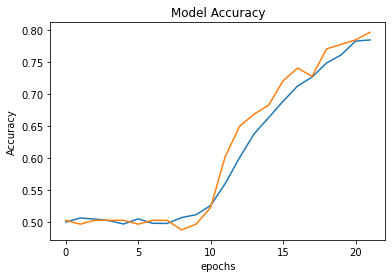

In [65]:
import matplotlib.pyplot as plt
print(history.history.keys())
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title("Model Accuracy")
plt.ylabel("Accuracy")
plt.xlabel("epochs")

In [66]:
model.save("chatbot_model")

INFO:tensorflow:Assets written to: chatbot_model/assets


INFO:tensorflow:Assets written to: chatbot_model/assets


In [67]:
model.load_weights("chatbot_model")

In [69]:
pred_results = model.predict(([inputs_test,queries_test]))
pred_results

array([[1.6592512e-10, 1.1767155e-10, 1.7147647e-10, ..., 1.4924185e-10,
        1.7309783e-10, 1.8570968e-10],
       [3.7073744e-10, 2.7498789e-10, 3.8992665e-10, ..., 3.7997033e-10,
        4.2290310e-10, 4.2677070e-10],
       [1.7054638e-10, 1.0682338e-10, 1.0843876e-10, ..., 1.0528785e-10,
        1.6988765e-10, 1.5011589e-10],
       ...,
       [1.7624976e-10, 1.1198159e-10, 1.7064150e-10, ..., 1.5920774e-10,
        1.7810775e-10, 2.1127029e-10],
       [1.0835871e-10, 6.0829772e-11, 5.6144183e-11, ..., 6.4610338e-11,
        9.7654489e-11, 9.2339150e-11],
       [2.7165717e-10, 2.1569435e-10, 1.3743696e-10, ..., 1.6168540e-10,
        2.7109351e-10, 2.8036604e-10]], dtype=float32)

In [70]:
test_data[0][0]

['Mary',
 'got',
 'the',
 'milk',
 'there',
 '.',
 'John',
 'moved',
 'to',
 'the',
 'bedroom',
 '.']

In [71]:
story = ''.join(word for word in test_data[100][0])
story

'Johntooktheapplethere.Johnwenttothebathroom.'

In [72]:
query = ''.join(word for word in test_data[100][1])
query

'IsJohninthehallway?'

In [73]:
test_data[100][2]

'no'

In [74]:
val_max = np.argmax(pred_results[37])

for key, val in tokenizer.word_index.items():
  if val== val_max:
    k=key
print("Predicted Answer is",k)
print("Probability of certainity", pred_results[37][val_max])

Predicted Answer is yes
Probability of certainity 0.8111156


In [75]:
vocab

{'.',
 '?',
 'Daniel',
 'Is',
 'John',
 'Mary',
 'Sandra',
 'apple',
 'back',
 'bathroom',
 'bedroom',
 'discarded',
 'down',
 'dropped',
 'football',
 'garden',
 'got',
 'grabbed',
 'hallway',
 'in',
 'journeyed',
 'kitchen',
 'left',
 'milk',
 'moved',
 'no',
 'office',
 'picked',
 'put',
 'the',
 'there',
 'to',
 'took',
 'travelled',
 'up',
 'went',
 'yes'}

In [76]:
story = "Daniel dropped the milk . john discarded football in office . Daniel went to kitchen . "
story.split()

['Daniel',
 'dropped',
 'the',
 'milk',
 '.',
 'john',
 'discarded',
 'football',
 'in',
 'office',
 '.',
 'Daniel',
 'went',
 'to',
 'kitchen',
 '.']

In [77]:
my_question="Is John in the garden ? "

In [78]:
my_question.split()

['Is', 'John', 'in', 'the', 'garden', '?']

In [79]:
mydata=[(story.split(),my_question.split(),'yes')]

In [81]:
my_story,my_ques,my_ans = vectorize_stories(mydata)

In [82]:
pred_results = model.predict(([my_story,my_ques]))

In [84]:
val_max = np.argmax(pred_results[0])

for key, val in tokenizer.word_index.items():
  if val==val_max:
    k=key
print("Predicted Answer is",k)
print("Probability of certainity", pred_results[0][val_max])


Predicted Answer is no
Probability of certainity 0.8041972
